# **Latent Variable Models**

Given data:  
$$
D = \{ x_1, x_2, \dots, x_n \} \quad \text{i.i.d. } \sim P_X
$$

Suppose $P_\theta$ denotes a **parametric model**.

---

## **Definition of a Latent Variable Model**

The **marginal distribution** of $x$ can be written as:

$$
P(x) = \sum_z P(x,z)
\quad \text{or} \quad
P(x) = \int P(x,z)\, dz
$$

- Use **$\sum$** if $z$ is **discrete**  
- Use **$\int$** if $z$ is **continuous**

---

## **Latent / Hidden / Unobserved Random Variable**

- Typically, $z$ is **jointly estimated** along with the model parameters $\theta$.  
- For each $x_i \in D$, we assume there exists a **latent variable** $z_i$ corresponding to $x_i$.

---

### **Examples**

#### **a) Discrete Latent Variable**

- $z_i \in \{1,2,\dots,M\}$  
- $x_i \in \mathbb{R}^d$  
- Each $x_i$ is **clustered** into one of $M$ categories → **Clustering**

**Examples:**
- Gaussian Mixture Models (GMM)  
- k-Means clustering

---

#### **b) Continuous Latent Variable**

- $x_i \in \mathbb{R}^d$  
- $z_i \in \mathbb{R}^k$  

Here, $z_i \mid x_i$ represents a **feature vector** corresponding to $x_i$.

**Examples:**
- Auto-Encoders  
- Variational Auto-Encoders (VAE)  

---

## **Generative Modeling Perspective**

Latent variable models can also be used as **generative models**:

1. Sample latent $z \sim P(z)$  
2. Generate observed data $x \sim P_\theta(x \mid z)$


## K-Means Clustering (Discrete Latent Variables)

Step 1: Data generated for 3 clusters (latent categories)


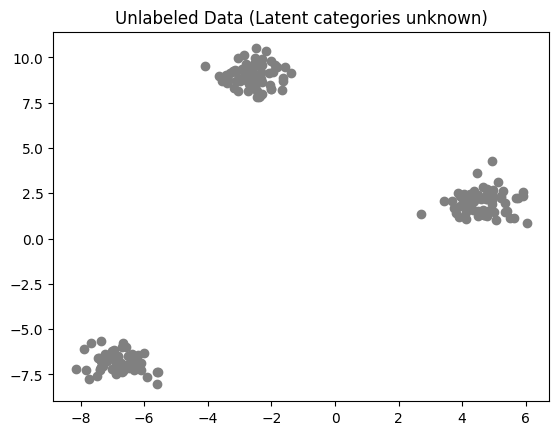

Step 2: Randomly initialized centroids:
 [[ 5.6991515  2.2161586]
 [-2.4494069  8.712201 ]
 [ 5.21228    2.3640044]]
Step 3: Updated centroids:
 [[ 5.687291   1.7254082]
 [-2.5989716  8.980255 ]
 [-1.5271201 -2.6704113]]
Step 4: Updated centroids:
 [[ 4.6352606  2.049996 ]
 [-2.5989716  8.980255 ]
 [-6.799088  -6.86291  ]]
Step 5: Updated centroids:
 [[ 4.6352606  2.049996 ]
 [-2.5989716  8.980255 ]
 [-6.799088  -6.86291  ]]
Step 6: Updated centroids:
 [[ 4.6352606  2.049996 ]
 [-2.5989716  8.980255 ]
 [-6.799088  -6.86291  ]]
Step 7: Updated centroids:
 [[ 4.6352606  2.049996 ]
 [-2.5989716  8.980255 ]
 [-6.799088  -6.86291  ]]


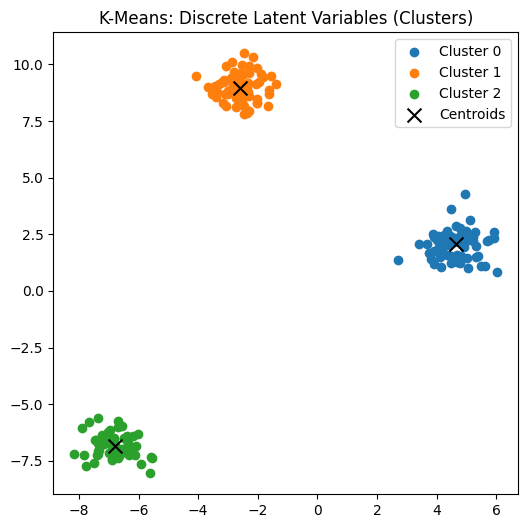

In [1]:
# 🔹 Latent Variable Model: K-Means (Discrete latent z)
# Each point belongs to a cluster -> z ∈ {1,2,...,K}

import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Step 1: Generate simple 2D data
X, _ = make_blobs(n_samples=200, centers=3, cluster_std=0.6, random_state=42)
X = jnp.array(X)

print("Step 1: Data generated for 3 clusters (latent categories)")
plt.scatter(X[:,0], X[:,1], color='gray')
plt.title("Unlabeled Data (Latent categories unknown)")
plt.show()

# Step 2: Initialize 3 random centroids
key = jax.random.PRNGKey(42)
centroids = jax.random.permutation(key, X)[:3]
print("Step 2: Randomly initialized centroids:\n", centroids)

# Step 3: Iteratively assign points to nearest cluster (latent z) and update centroids
for step in range(5):
    # Compute distances [num_points x num_centroids]
    dists = jnp.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=-1)
    labels = jnp.argmin(dists, axis=1)  # Assign cluster z_i

    # Update centroids as mean of assigned points
    centroids = jnp.array([X[labels==k].mean(axis=0) for k in range(3)])
    print(f"Step {step+3}: Updated centroids:\n", centroids)

# Step 4: Visualize final clusters
plt.figure(figsize=(6,6))
for k in range(3):
    plt.scatter(X[labels==k,0], X[labels==k,1], label=f"Cluster {k}")
plt.scatter(centroids[:,0], centroids[:,1], color='black', marker='x', s=100, label='Centroids')
plt.title("K-Means: Discrete Latent Variables (Clusters)")
plt.legend()
plt.show()


## Gaussian Mixture Model (GMM, Discrete Latent Variables)

Step 1: Use same data as K-Means for GMM


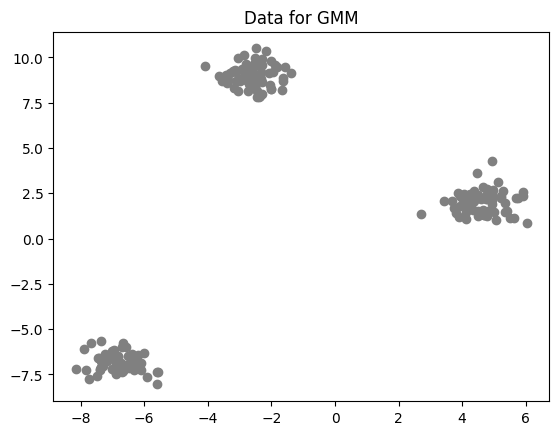


Step 2: Fit a Gaussian Mixture Model (3 components)
Step 3: First 5 responsibility vectors (latent z probabilities):
 [[2.78315146e-079 1.42539185e-229 1.00000000e+000]
 [1.00000000e+000 3.93665483e-260 1.46194804e-076]
 [3.88157864e-179 1.00000000e+000 5.07109343e-118]
 [1.73324849e-190 1.00000000e+000 1.27456420e-130]
 [2.60902890e-161 1.00000000e+000 3.31628761e-112]]


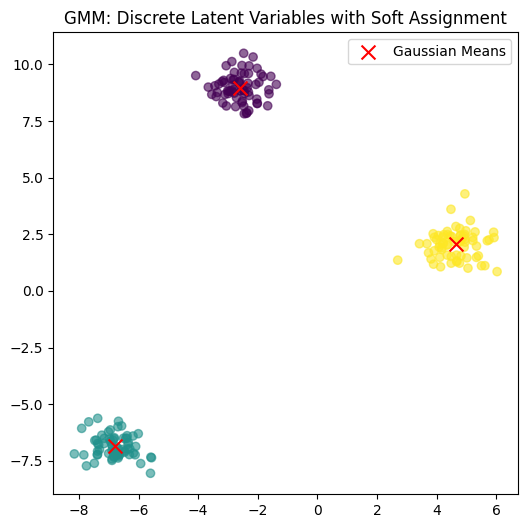

In [2]:
# 🔹 Latent Variable Model: Gaussian Mixture Model (GMM)
# Each point belongs to a Gaussian cluster z ∈ {1,2,...,K}

from sklearn.mixture import GaussianMixture

print("Step 1: Use same data as K-Means for GMM")
plt.scatter(X[:,0], X[:,1], color='gray')
plt.title("Data for GMM")
plt.show()

print("\nStep 2: Fit a Gaussian Mixture Model (3 components)")
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

# Step 3: Predict cluster responsibilities (soft assignment)
probs = gmm.predict_proba(X)  # Each row sums to 1
labels = gmm.predict(X)

print("Step 3: First 5 responsibility vectors (latent z probabilities):\n", probs[:5])

# Step 4: Visualize clusters with soft assignment color
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(gmm.means_[:,0], gmm.means_[:,1], color='red', marker='x', s=100, label='Gaussian Means')
plt.title("GMM: Discrete Latent Variables with Soft Assignment")
plt.legend()
plt.show()


## Simple Autoencoder (Continuous Latent Variables)

In [6]:
!pip install --quiet dm-haiku optax


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.8/373.8 kB 8.0 MB/s eta 0:00:00


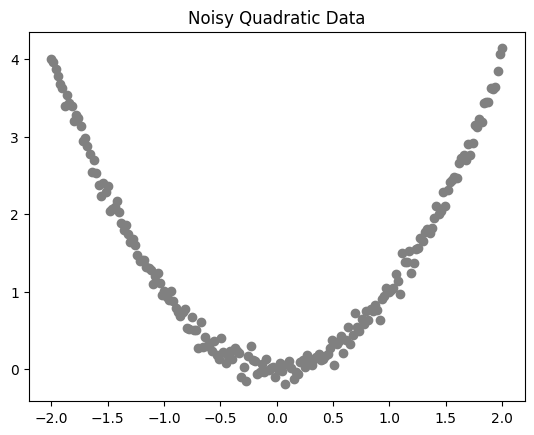

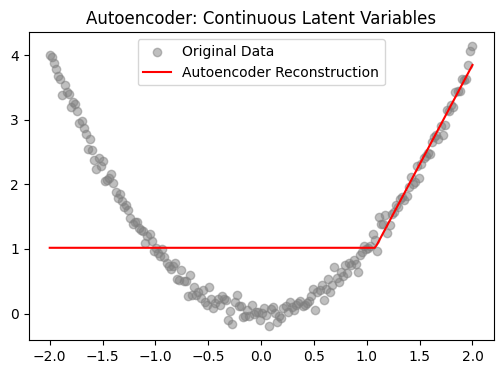

In [7]:
# 🔹 Latent Variable Model: Autoencoder
# Continuous latent z = compressed feature vector

import haiku as hk
import optax

# Step 1: Create synthetic 1D data (line + noise)
x_data = jnp.linspace(-2, 2, 200).reshape(-1,1)
y_data = x_data**2 + 0.1*jax.random.normal(key, shape=x_data.shape)

plt.scatter(x_data, y_data, color='gray')
plt.title("Noisy Quadratic Data")
plt.show()

# Step 2: Define a tiny Autoencoder using Haiku
def autoencoder(x):
    z = hk.Sequential([hk.Linear(2), jax.nn.relu])(x)  # Encoder -> latent z
    x_recon = hk.Sequential([hk.Linear(1)])(z)         # Decoder
    return x_recon, z

def loss_fn(params, x):
    x_recon, _ = model.apply(params, None, x)
    return jnp.mean((x_recon - y_data)**2)

# Transform model
model = hk.transform(autoencoder)
params = model.init(key, x_data)

# Step 3: Train with simple gradient descent
opt = optax.adam(0.1)
opt_state = opt.init(params)

for step in range(300):
    grads = jax.grad(loss_fn)(params, x_data)
    updates, opt_state = opt.update(grads, opt_state)
    params = optax.apply_updates(params, updates)

# Step 4: Visualize reconstructed curve
x_recon, z_latent = model.apply(params, None, x_data)

plt.figure(figsize=(6,4))
plt.scatter(x_data, y_data, color='gray', alpha=0.5, label='Original Data')
plt.plot(x_data, x_recon, color='red', label='Autoencoder Reconstruction')
plt.title("Autoencoder: Continuous Latent Variables")
plt.legend()
plt.show()


## Variational Autoencoder (VAE, Continuous Latent Variables)

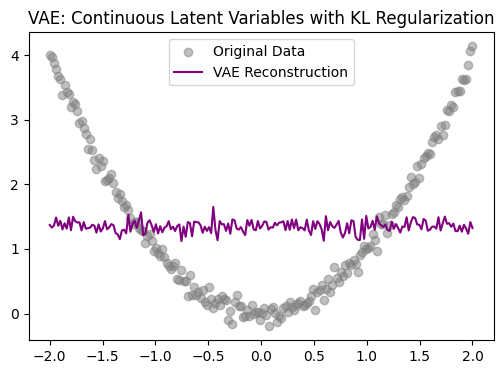

In [9]:
# 🔹 Latent Variable Model: VAE (Continuous latent z with probabilistic encoding)

# Step 1: Define simple encoder and decoder networks
def encoder(x):
    h = hk.Linear(4)(x)
    mu = hk.Linear(2)(h)       # Mean of latent
    logvar = hk.Linear(2)(h)   # Log-variance of latent
    return mu, logvar

def decoder(z):
    return hk.Linear(1)(hk.Linear(4)(z))  # simple reconstruction

def vae_forward(x):
    mu, logvar = encoder(x)
    std = jnp.exp(0.5 * logvar)
    eps = jax.random.normal(key, shape=std.shape)
    z = mu + eps * std               # reparameterization
    x_recon = decoder(z)
    return x_recon, mu, logvar

vae = hk.transform(vae_forward)
params = vae.init(key, x_data)

def vae_loss(params, x):
    x_recon, mu, logvar = vae.apply(params, None, x)
    recon_loss = jnp.mean((x_recon - y_data)**2)
    kl_loss = -0.5 * jnp.mean(1 + logvar - mu**2 - jnp.exp(logvar))
    return recon_loss + kl_loss

# Step 2: Train VAE
opt = optax.adam(0.1)
opt_state = opt.init(params)

for step in range(3000):
    grads = jax.grad(vae_loss)(params, x_data)
    updates, opt_state = opt.update(grads, opt_state)
    params = optax.apply_updates(params, updates)

# Step 3: Visualize reconstruction
x_recon, mu, logvar = vae.apply(params, None, x_data)

plt.figure(figsize=(6,4))
plt.scatter(x_data, y_data, color='gray', alpha=0.5, label='Original Data')
plt.plot(x_data, x_recon, color='purple', label='VAE Reconstruction')
plt.title("VAE: Continuous Latent Variables with KL Regularization")
plt.legend()
plt.show()
